In [86]:
words = open("data/lastname.txt").read().splitlines()

In [87]:
words[:10]

['mollel',
 'mainoya',
 'mosses',
 'mallya',
 'moses',
 'kiveyani',
 'samwel',
 'kisunte',
 'gaston',
 'kasiko']

In [88]:
len(words)

25189

In [89]:
min(len(w) for w in words)

1

In [90]:
max(len(w) for w in words)

17

In [91]:
max(words, key=len)

'wilfredmlyapatali'

In [92]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1
       


In [93]:
sorted_bihs = sorted(b.items(), key=lambda x: -x[1])

In [94]:
import torch

In [95]:
N = torch.zeros((30,30), dtype=torch.int32)


In [96]:
chars = sorted(list((set(''.join(words)))))
stoi = {ch: i for i, ch in enumerate(chars)}
stoi["<S>"] = len(chars) 
stoi["<E>"] = len(chars) + 1
stoi

{"'": 0,
 '-': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27,
 '<S>': 28,
 '<E>': 29}

In [97]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 #because everything starts at zero

In [102]:
itos = {i: ch for ch, i in stoi.items()}


{0: "'",
 1: '-',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'j',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'p',
 18: 'q',
 19: 'r',
 20: 's',
 21: 't',
 22: 'u',
 23: 'v',
 24: 'w',
 25: 'x',
 26: 'y',
 27: 'z',
 28: '<S>',
 29: '<E>'}

(-0.5, 29.5, 29.5, -0.5)

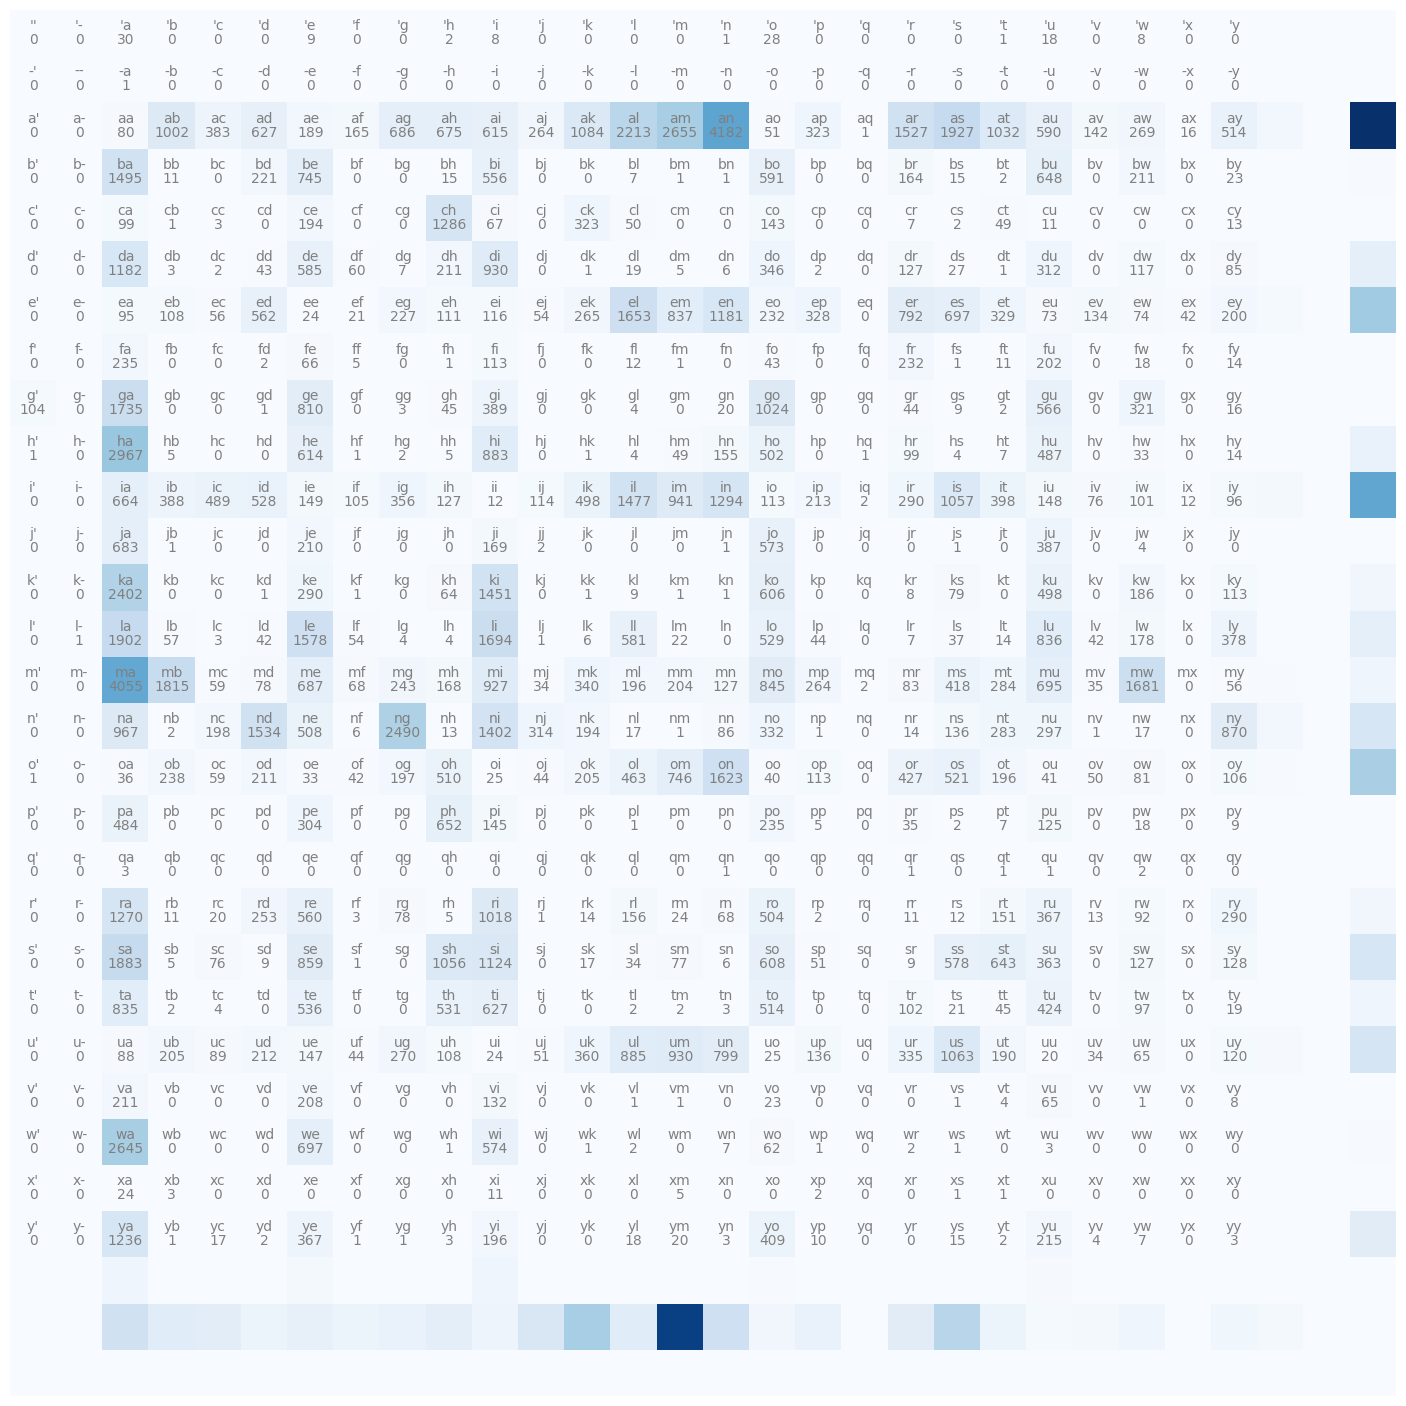

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.axis('off')

In [ ]:
#https://youtu.be/PaCmpygFfXo?t=1345